In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 20.4 MB/s eta 0:00:00


In [3]:
!unzip "/content/aorta.zip"

Streaming output truncated to the last 5000 lines.
  inflating: aorta/valid/labels/Other valid (33).txt  
  inflating: __MACOSX/aorta/valid/labels/._Other valid (33).txt  
  inflating: aorta/valid/labels/Aorta valid (65).txt  
  inflating: __MACOSX/aorta/valid/labels/._Aorta valid (65).txt  
  inflating: aorta/valid/labels/V sign valid (243).txt  
  inflating: __MACOSX/aorta/valid/labels/._V sign valid (243).txt  
  inflating: aorta/valid/labels/Other valid (38).txt  
  inflating: __MACOSX/aorta/valid/labels/._Other valid (38).txt  
  inflating: aorta/valid/labels/Aorta valid (81).txt  
  inflating: __MACOSX/aorta/valid/labels/._Aorta valid (81).txt  
  inflating: aorta/valid/labels/V sign valid (306).txt  
  inflating: __MACOSX/aorta/valid/labels/._V sign valid (306).txt  
  inflating: aorta/valid/labels/Flows valid (97).txt  
  inflating: __MACOSX/aorta/valid/labels/._Flows valid (97).txt  
  inflating: aorta/valid/labels/Flows valid (78).txt  
  inflating: __MACOSX/aorta/valid/label

In [4]:
%%writefile /content/aorta/data.yaml
train: /content/aorta/train/images
val: /content/aorta/valid/images
nc: 5
names: ['Aorta', 'Flows', 'Other', 'V sign','X sign']

Writing /content/aorta/data.yaml


In [5]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 83.1MB/s]


In [6]:
train_results = model.train(
    data = "/content/aorta/data.yaml",
    epochs = 30,
    imgsz = 640,
    batch = 8
)

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/aorta/data.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/aorta/train/labels... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<00:00, 2067.47it/s]


train: New cache created: /content/aorta/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/aorta/valid/labels... 396 images, 0 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<00:00, 1410.35it/s]


val: New cache created: /content/aorta/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.35G      1.819      3.406      1.864         23        640: 100%|██████████| 150/150 [00:34<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

                   all        396        403      0.168      0.242      0.128     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.27G      1.721      2.509      1.727         15        640: 100%|██████████| 150/150 [00:32<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]


                   all        396        403        0.2      0.459      0.281     0.0776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.27G      1.733      2.201      1.658         17        640: 100%|██████████| 150/150 [00:35<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]


                   all        396        403     0.0856      0.383     0.0554     0.0119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.27G      1.711      1.958      1.637         18        640: 100%|██████████| 150/150 [00:31<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]


                   all        396        403      0.231      0.231      0.246     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.27G      1.679      1.756      1.589         19        640: 100%|██████████| 150/150 [00:31<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.27it/s]

                   all        396        403      0.379       0.54       0.28     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.27G      1.634      1.647      1.579         19        640: 100%|██████████| 150/150 [00:31<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.43it/s]

                   all        396        403      0.183       0.21      0.136     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.27G       1.63      1.524      1.562         15        640: 100%|██████████| 150/150 [00:30<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]

                   all        396        403      0.142      0.249      0.146     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.27G      1.592      1.469      1.537         20        640: 100%|██████████| 150/150 [00:30<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]

                   all        396        403       0.23      0.172      0.165     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.27G      1.584      1.368      1.539         15        640: 100%|██████████| 150/150 [00:32<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]

                   all        396        403      0.421      0.625      0.593       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.27G      1.535      1.283      1.507         20        640: 100%|██████████| 150/150 [00:31<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  8.34it/s]

                   all        396        403      0.219      0.459      0.213     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.27G      1.531      1.245      1.498         15        640: 100%|██████████| 150/150 [00:37<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]

                   all        396        403      0.373      0.578      0.301     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.27G      1.514      1.217      1.487         20        640: 100%|██████████| 150/150 [00:31<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.09it/s]

                   all        396        403      0.395      0.634      0.378     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.27G      1.485      1.147      1.462         19        640: 100%|██████████| 150/150 [00:31<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.99it/s]

                   all        396        403      0.309      0.536      0.473     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.27G      1.468      1.099      1.445         15        640: 100%|██████████| 150/150 [00:32<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.47it/s]

                   all        396        403      0.388      0.687      0.387     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.27G      1.447      1.078      1.441         16        640: 100%|██████████| 150/150 [00:29<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.82it/s]


                   all        396        403       0.32      0.506      0.269     0.0631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.27G      1.451      1.048      1.436         20        640: 100%|██████████| 150/150 [00:29<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]

                   all        396        403      0.348      0.562      0.526      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.27G      1.435      1.019      1.421         13        640: 100%|██████████| 150/150 [00:31<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.73it/s]

                   all        396        403      0.367       0.53      0.315     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.27G      1.405     0.9915      1.426         18        640: 100%|██████████| 150/150 [00:32<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.48it/s]

                   all        396        403      0.352       0.55      0.335     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.27G      1.405     0.9986      1.428         17        640: 100%|██████████| 150/150 [00:32<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.07it/s]

                   all        396        403      0.332      0.528      0.276     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.27G      1.348     0.8997      1.368         17        640: 100%|██████████| 150/150 [00:31<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.29it/s]

                   all        396        403       0.38      0.542        0.4      0.082


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.26G      1.363      0.707      1.471          8        640: 100%|██████████| 150/150 [00:32<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]


                   all        396        403      0.433      0.566      0.548      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.26G      1.334     0.6767      1.445          8        640: 100%|██████████| 150/150 [00:30<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.09it/s]

                   all        396        403      0.445      0.667      0.643      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.26G      1.301     0.6435       1.42          8        640: 100%|██████████| 150/150 [00:31<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.22it/s]

                   all        396        403      0.482      0.616      0.405     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.26G      1.253     0.6283        1.4          8        640: 100%|██████████| 150/150 [00:31<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.32it/s]

                   all        396        403      0.427      0.564       0.34     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.26G      1.212       0.59       1.35          8        640: 100%|██████████| 150/150 [00:30<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.29it/s]

                   all        396        403      0.407      0.544      0.317     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.26G        1.2     0.5839      1.343          8        640: 100%|██████████| 150/150 [00:35<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  8.36it/s]

                   all        396        403      0.444      0.652      0.464      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.26G      1.152     0.5605       1.32          8        640: 100%|██████████| 150/150 [00:31<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]

                   all        396        403       0.38      0.578      0.321     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.26G      1.132     0.5398      1.306          8        640: 100%|██████████| 150/150 [00:30<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]

                   all        396        403      0.464      0.653        0.4     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.26G      1.095      0.527      1.275          8        640: 100%|██████████| 150/150 [00:30<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]

                   all        396        403      0.402      0.602      0.454     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.26G      1.055     0.5117      1.266          8        640: 100%|██████████| 150/150 [00:32<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]

                   all        396        403      0.422      0.622       0.43     0.0969



30 epochs completed in 0.306 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]


                   all        396        403      0.445      0.668      0.644      0.175
                 Aorta          1          1    0.00854          1      0.995      0.298
                 Flows        195        195      0.547      0.292      0.319     0.0622
                 Other        100        100      0.712       0.74      0.708      0.196
                V sign        100        107      0.512      0.638      0.554      0.144
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


In [7]:
from ultralytics import YOLO

# Load the trained model from the best.pt file
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [16]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!unzip "/content/testing.zip"

Archive:  /content/testing.zip
   creating: testing/
  inflating: __MACOSX/._testing      
  inflating: testing/right_half_V sign train (656).jpg  
  inflating: __MACOSX/testing/._right_half_V sign train (656).jpg  
  inflating: testing/right_half_Other train (499).jpg  
  inflating: __MACOSX/testing/._right_half_Other train (499).jpg  
  inflating: testing/right_half_Other train (533).jpg  
  inflating: __MACOSX/testing/._right_half_Other train (533).jpg  
  inflating: testing/right_half_V sign train (683).jpg  
  inflating: __MACOSX/testing/._right_half_V sign train (683).jpg  
  inflating: testing/right_half_Flows train (682).jpg  
  inflating: __MACOSX/testing/._right_half_Flows train (682).jpg  
  inflating: testing/right_half_Aorta train (433).jpg  
  inflating: __MACOSX/testing/._right_half_Aorta train (433).jpg  
  inflating: testing/right_half_Aorta train (472).jpg  
  inflating: __MACOSX/testing/._right_half_Aorta train (472).jpg  
  inflating: testing/right_half_Flows train 

In [17]:
results = model.predict(source="/content/testing", save=True)


image 1/160 /content/testing/right_half_Aorta train (431).jpg: 640x480 1 Aorta, 46.7ms
image 2/160 /content/testing/right_half_Aorta train (432).jpg: 640x480 1 Aorta, 8.4ms
image 3/160 /content/testing/right_half_Aorta train (433).jpg: 640x480 1 Aorta, 8.6ms
image 4/160 /content/testing/right_half_Aorta train (436).jpg: 640x480 1 Aorta, 8.2ms
image 5/160 /content/testing/right_half_Aorta train (437).jpg: 640x480 1 Aorta, 8.3ms
image 6/160 /content/testing/right_half_Aorta train (440).jpg: 640x480 1 Aorta, 8.3ms
image 7/160 /content/testing/right_half_Aorta train (441).jpg: 640x480 1 Aorta, 8.0ms
image 8/160 /content/testing/right_half_Aorta train (444).jpg: 640x480 1 Aorta, 8.0ms
image 9/160 /content/testing/right_half_Aorta train (445).jpg: 640x480 1 Aorta, 7.9ms
image 10/160 /content/testing/right_half_Aorta train (447).jpg: 640x480 1 Aorta, 8.2ms
image 11/160 /content/testing/right_half_Aorta train (449).jpg: 640x480 1 Aorta, 9.5ms
image 12/160 /content/testing/right_half_Aorta tra

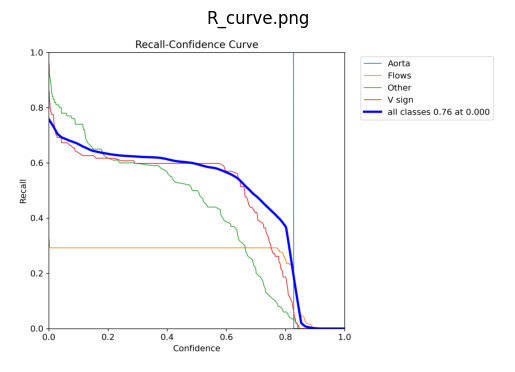

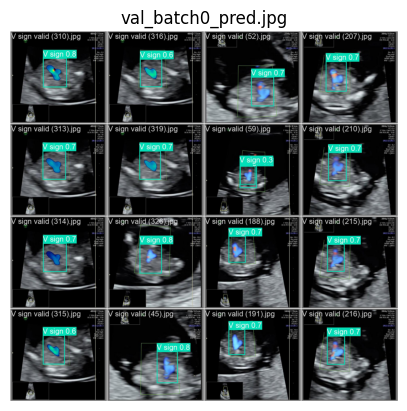

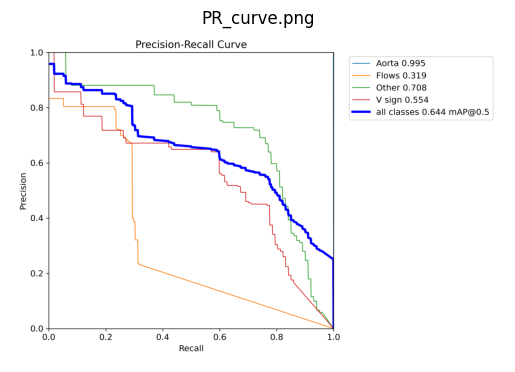

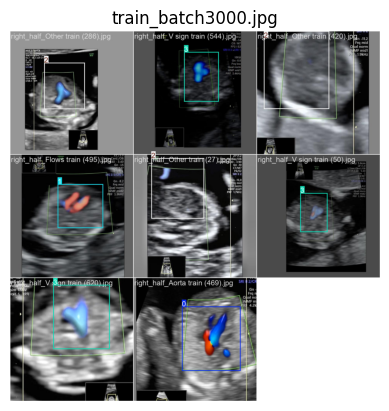

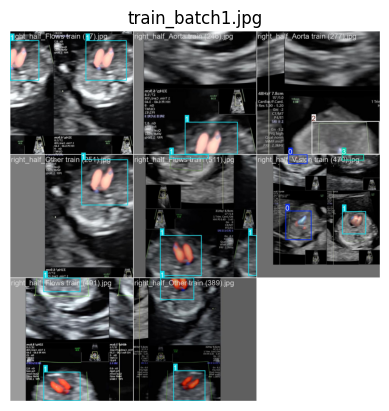

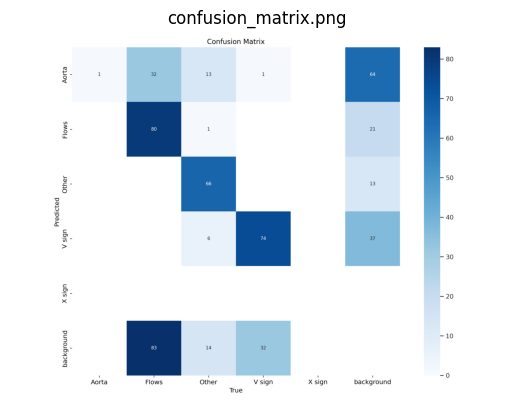

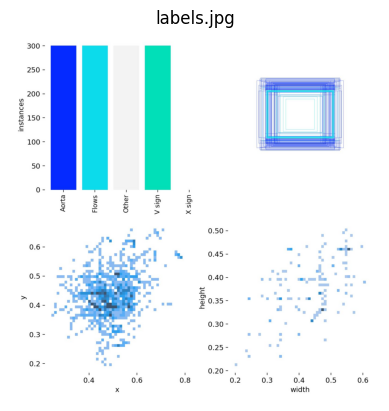

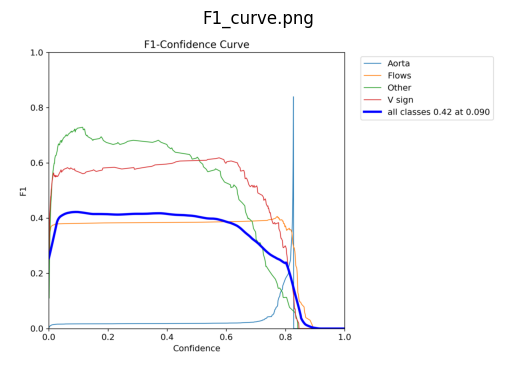

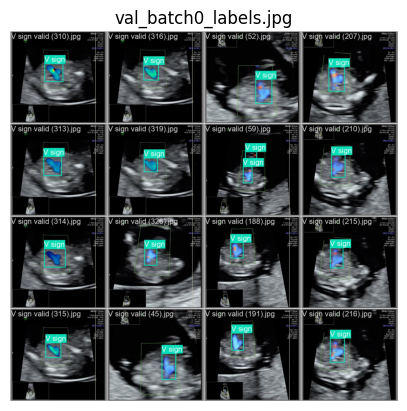

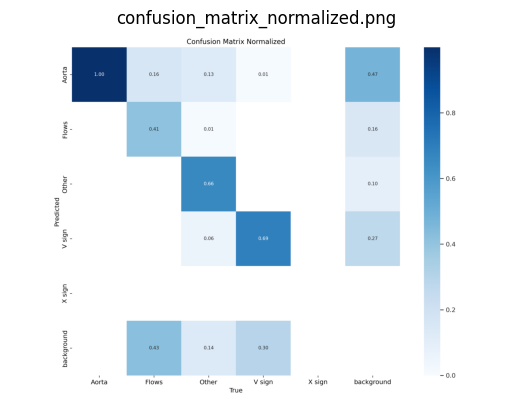

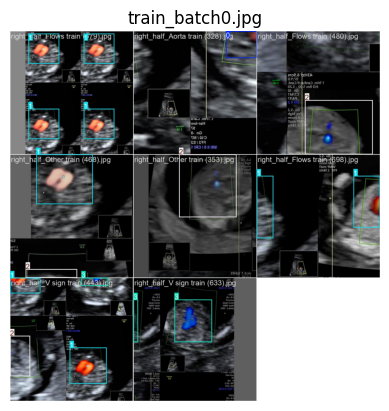

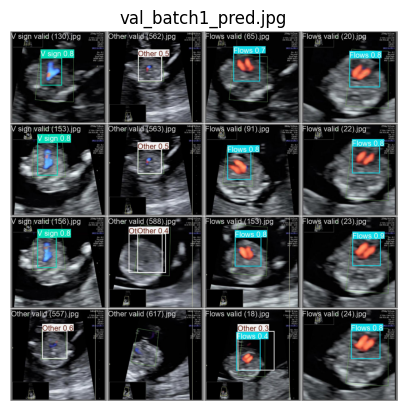

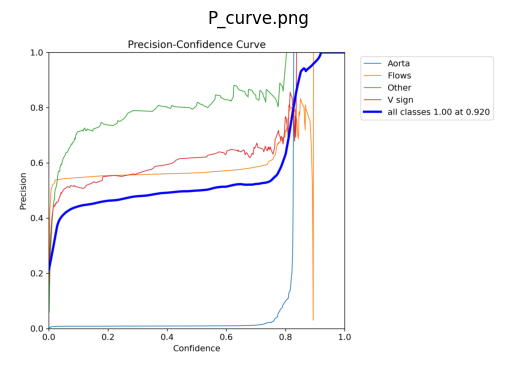

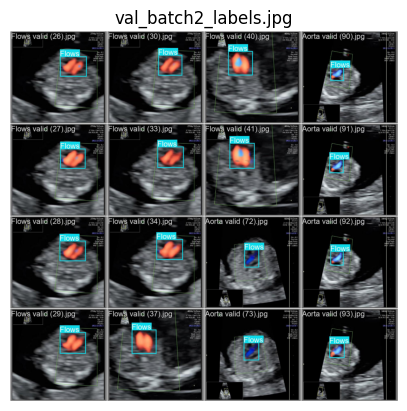

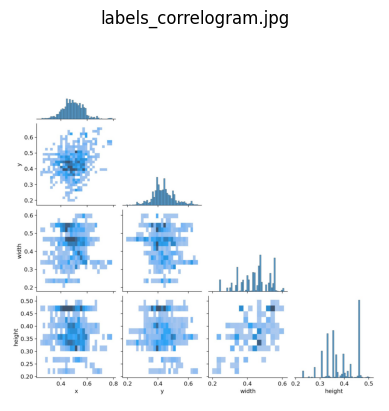

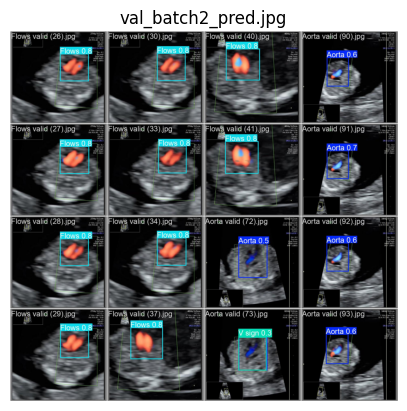

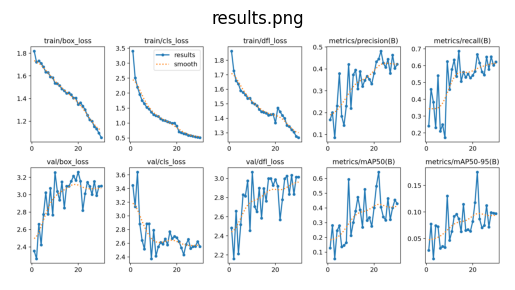

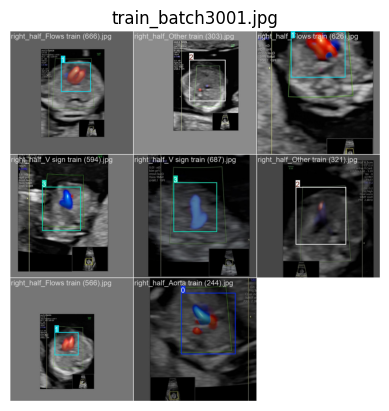

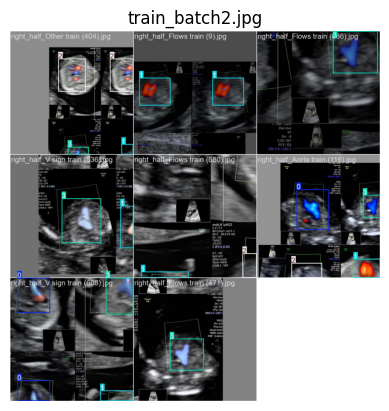

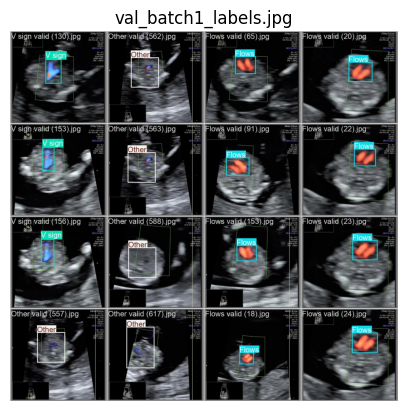

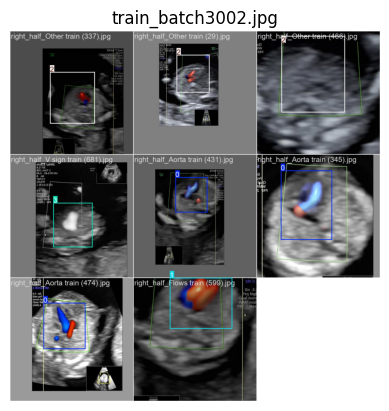

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_dir = "/content/runs/detect/train"

if os.path.exists(image_dir):
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        try:
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(image_file)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error displaying image {image_file}: {e}")
else:
    print(f"Directory '{image_dir}' not found.")

In [2]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import os
import shutil
from google.colab import files

image_dir = "/content/runs/detect/train"
image_files = []
if os.path.exists(image_dir):
  for filename in os.listdir(image_dir):
    if os.path.isfile(os.path.join(image_dir, filename)) and filename.lower().endswith(('.png','.jpg','.jpeg','.gif','.bmp')):
      image_files.append(filename)

    with PdfPages("output.pdf") as pdf:
      for i in image_files:
        image_path = os.path.join(image_dir, i)
        img = mpimg.imread(image_path)
        fig, ax = plt.subplots()
        ax.imshow(img)
        ax.set_title(i)
        ax.axis('off')

        pdf.savefig(fig)
        plt.close()
else:
  print(f"The directory '{image_dir}' does not exist.")


In [4]:
os.makedirs("/content/output_images", exist_ok = True)

shutil.make_archive("fetalEchocardiogram", 'zip', "/content/aorta")
files.download("/content/fetalEchocardiogram.zip")

shutil.make_archive("fetalEchocardiogram_runs", 'zip', "/content/runs")
files.download("/content/fetalEchocardiogram_runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.backends.backend_pdf import PdfPages

# Paths
test_images_path = "/content/testing"
predictions_path = "/content/runs/detect/predict"

# Get list of files
test_images = sorted([f for f in os.listdir(test_images_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
prediction_images = sorted([f for f in os.listdir(predictions_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Ensure equal number of images
if len(test_images) != len(prediction_images):
    print("Warning: The number of test images and prediction images do not match!")

# Create a PDF file to save the plot
pdf_filename = "/content/output.pdf"
with PdfPages(pdf_filename) as pdf:
    for i, (test_img, pred_img) in enumerate(zip(test_images, prediction_images)):
        # Load images
        test_image = Image.open(os.path.join(test_images_path, test_img))
        prediction_image = Image.open(os.path.join(predictions_path, pred_img))

        # Plot images side-by-side
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # Plot test image
        axs[0].imshow(test_image)
        axs[0].axis('off')
        axs[0].set_title(f"Test Image: {test_img}")

        # Plot prediction image
        axs[1].imshow(prediction_image)
        axs[1].axis('off')
        axs[1].set_title(f"Prediction: {pred_img}")

        # Add the current figure to the PDF
        pdf.savefig(fig)
        plt.close(fig)  # Close the figure to free memory

print(f"PDF saved as: {pdf_filename}")


PDF saved as: /content/output.pdf


In [9]:
!pip install python-docx
from docx import Document
from docx.shared import Inches, Cm
import os
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt
import glob

def create_image_comparison_document(input_directory, output_directory, result_file):
    # Create a new Word document
    doc = Document()

    # Set margin to narrow - 1.27 cm (0.5 inch)
    sections = doc.sections
    for section in sections:
        section.left_margin = Cm(1.27)
        section.right_margin = Cm(1.27)
        section.top_margin = Cm(1.27)
        section.bottom_margin = Cm(1.27)

    # Get all image files from input directory
    input_files = {}
    for ext in ('*.png', '*.jpg', '*.jpeg', '*.tif', '*.tiff'):
        for file_path in glob.glob(os.path.join(input_directory, ext)):
            filename = os.path.basename(file_path)
            input_files[filename] = file_path

    # Match with output files
    paired_images = []
    for filename, input_path in input_files.items():
        # Look for matching file in output directory
        output_path = os.path.join(output_directory, filename)
        if os.path.exists(output_path):
            paired_images.append((input_path, output_path))

    # Sort pairs by filename to ensure consistent ordering
    paired_images.sort(key=lambda x: os.path.basename(x[0]))

    # Add title
    title = doc.add_paragraph("Image Comparison Results")
    title_format = title.runs[0].font
    title_format.size = Pt(16)
    title_format.bold = True
    title.alignment = WD_ALIGN_PARAGRAPH.CENTER

    # Process each pair of images
    for input_path, output_path in paired_images:
        # Create a table with 1 row and 2 columns
        table = doc.add_table(rows=2, cols=2)
        table.style = 'Table Grid'

        # Add headers
        table.cell(0, 0).text = "Input Image"
        table.cell(0, 1).text = "Output Image"

        # Center align headers
        for cell in table.rows[0].cells:
            cell.paragraphs[0].alignment = WD_ALIGN_PARAGRAPH.CENTER
            cell.paragraphs[0].runs[0].font.bold = True

        # Add images
        for col, image_path in enumerate([input_path, output_path]):
            cell = table.cell(1, col)

            # Add image
            paragraph = cell.paragraphs[0]
            run = paragraph.add_run()
            run.add_picture(image_path, width=Inches(3))  # Adjust width as needed

            # Center align the image
            paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

        # Add filename below table
        filename = os.path.basename(input_path)
        filename_paragraph = doc.add_paragraph(f"Filename: {filename}")
        filename_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

        # Add spacing after each comparison
        doc.add_paragraph()

    # Save the document
    doc.save(result_file)

# Example usage
if __name__ == "__main__":
    # Replace these paths with your actual paths
    input_dir = "/content/testing"
    output_dir = "/content/runs/detect/predict"
    result_file = "image_comparison_results.docx"

    create_image_comparison_document(input_dir, output_dir, result_file)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 7.7 MB/s eta 0:00:00
